In [1]:
import json
import re
import sys
from pathlib import Path
from iohblade.loggers import ExperimentLogger
from llamea.ast_features import extract_ast_features
from iohblade.loggers import ExperimentLogger
from iohblade.plots import *
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


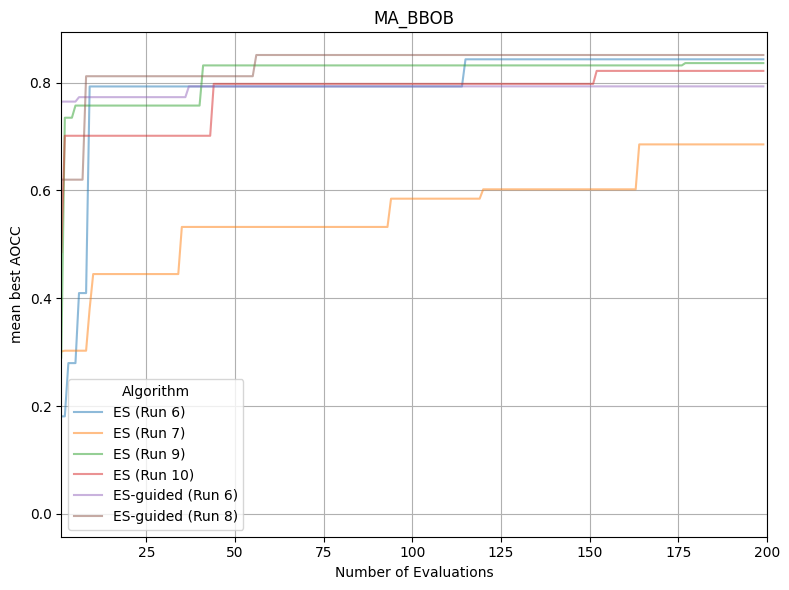

In [2]:
logger = ExperimentLogger('/home/neocortex/repos/BLADE/results/MABBOB_guided_next', True)
fig = plot_convergence(logger, metric="AOCC", methods=["ES", "ES-guided"], save=False, return_fig=True, budget=200, separate_lines=True)

plt.show()

In [2]:
logger = ExperimentLogger('/home/neocortex/repos/BLADE/results/MABBOB_guided', True)
logger.add_read_dir('/home/neocortex/repos/BLADE/results/MABBOB_guided_baselines')
logger.add_read_dir('/home/neocortex/repos/BLADE/results/MABBOB_guided_baselines2')
log_data = logger.get_data()
log_data.head()

,method_name,problem_name,llm_name,method,problem,llm,solution,log_dir,seed
0,ES,MA_BBOB,gpt-5-mini-2025-08-07,"{'method_name': 'ES', 'budget': 200, 'kwargs':...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gpt-5-mini-2025-08-07', 'code_patte...","{'id': '1075fb19-2d1a-4413-9005-a84684f12f29',...",run-ES-MA_BBOB-2,2
1,ES,MA_BBOB,gpt-5-mini-2025-08-07,"{'method_name': 'ES', 'budget': 200, 'kwargs':...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gpt-5-mini-2025-08-07', 'code_patte...","{'id': '97b09f41-16dd-4b97-b046-9dcd1f56a34c',...",run-ES-MA_BBOB-1,1
2,ES,MA_BBOB,gpt-5-mini-2025-08-07,"{'method_name': 'ES', 'budget': 200, 'kwargs':...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gpt-5-mini-2025-08-07', 'code_patte...","{'id': '008715f8-d903-40a3-b331-ffbbeff335d1',...",run-ES-MA_BBOB-5,5
3,ES,MA_BBOB,gpt-5-mini-2025-08-07,"{'method_name': 'ES', 'budget': 200, 'kwargs':...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gpt-5-mini-2025-08-07', 'code_patte...","{'id': '2a2b9226-c20f-44ac-95be-b81a5536bba3',...",run-ES-MA_BBOB-3,3
4,ES,MA_BBOB,gpt-5-mini-2025-08-07,"{'method_name': 'ES', 'budget': 200, 'kwargs':...","{'name': 'MA_BBOB', 'dims': [10], 'training_in...","{'model': 'gpt-5-mini-2025-08-07', 'code_patte...","{'id': '79bbe510-8d01-4e86-bb38-258c33bcbd1d',...",run-ES-MA_BBOB-4,4


In [3]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['LHNS:vns', 'ES', 'MCTS_AHD', 'ES (gemini)', 'ES-guided', 'ES-guided (gemini)']
['MA_BBOB']


In [6]:

logger1 = ExperimentLogger('/home/neocortex/repos/BLADE/results/MABBOB_guided', True)
logger2 = ExperimentLogger('/home/neocortex/repos/BLADE/results/MABBOB_guided_baselines', True)
logger3 = ExperimentLogger('/home/neocortex/repos/BLADE/results/MABBOB_guided_baselines2', True)

token_df1 = plot_token_usage(logger1, save=False, return_df=True)
token_df2 = plot_token_usage(logger2, save=False, return_df=True)
token_df3 = plot_token_usage(logger3, save=False, return_df=True)

token_df = pd.concat([token_df1, token_df2, token_df3], axis=0)

token_df['method_name'].replace({'ES': 'LLaMEA', 'ES-guided': 'LLaMEA-SAGE', 'LHNS:vns': "LHNS"}, inplace=True)




/tmp/ipykernel_3226435/2327122712.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  token_df['method_name'].replace({'ES': 'LLaMEA', 'ES-guided': 'LLaMEA-SAGE', 'LHNS:vns': "LHNS"}, inplace=True)


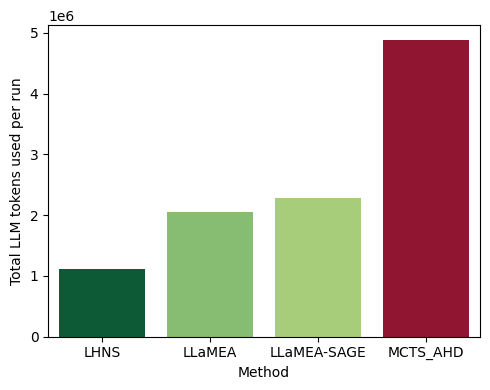

In [12]:

summary = (
    token_df[token_df["method_name"].isin(["LLaMEA", "LLaMEA-SAGE", "LHNS", "MCTS_AHD"])].groupby(["problem_name", "method_name"])["tokens"].mean().reset_index()
)

fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(
    data=summary,
    x="method_name",
    y="tokens",
    hue="tokens",
    palette="RdYlGn_r",
    ax=ax,
)
ax.legend_.remove()
ax.set_xlabel("Method")
ax.set_ylabel("Total LLM tokens used per run")
plt.tight_layout()
plt.show()

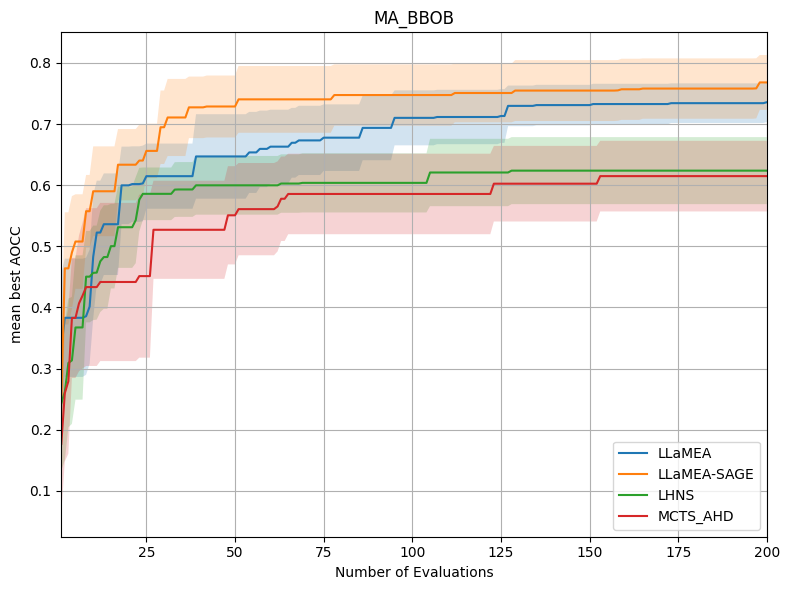

In [5]:
fig = plot_convergence(logger, metric="AOCC", aggregation="mean", methods=["ES", "ES-guided", "LHNS:vns","MCTS_AHD"], save=False, return_fig=True, budget=200, separate_lines=False, variance_aggregation="sem")
ax = fig.axes[0]   # or however you're getting your axis

handles, previous_labels = ax.get_legend_handles_labels()
new_labels = []
for label in previous_labels:
    if label == "ES":
        new_labels.append("LLaMEA")
    elif label == "ES-guided":
        new_labels.append("LLaMEA-SAGE")
    elif label == "LHNS:vns":
        new_labels.append("LHNS")
    else:
        new_labels.append(label)
ax.legend(handles=handles, labels=new_labels)
#ax.set_xscale('symlog')
#ax.set_yscale('symlog')
plt.savefig("MABBOB-aocc.png")
plt.show()

In [6]:
data = logger.get_problem_data("MA_BBOB")
data["operator"].unique()

array([None, 'random', 'refine', nan], dtype=object)

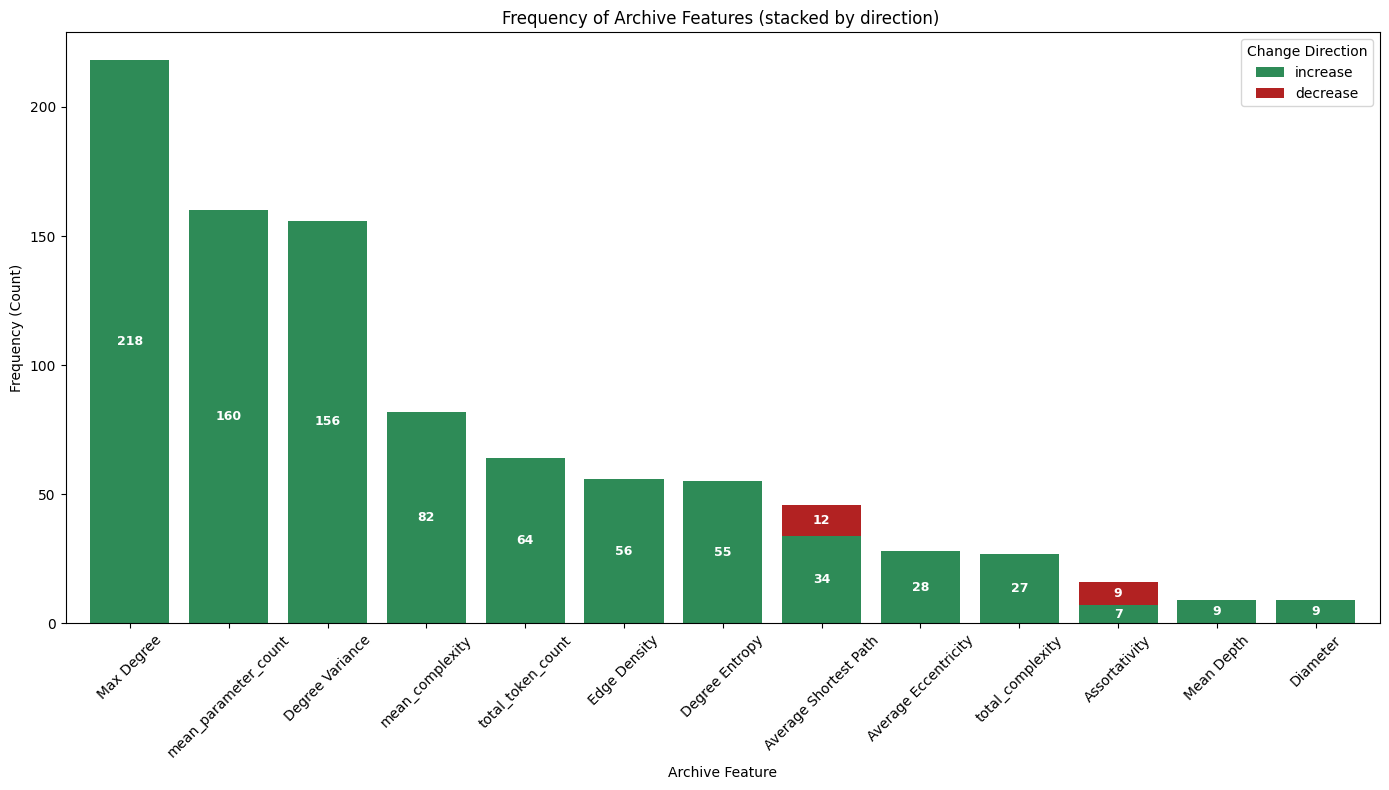

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_archive_feature_stacked_histograms_pandas(
    df: pd.DataFrame,
    name: str = "guided",
    outdir: str | None = None,
    feature_col: str = "archive_feature",
    direction_col: str = "archive_direction",
    seed_col: str = "seed",
    directions_order: tuple[str, ...] = ("increase", "decrease"),
    direction_colors: dict[str, str] | None = None,
    min_count_to_label: int = 1,
):
    """
    Proper stacked bar charts via pandas pivot + stacked bar plotting.

    Creates one plot per seed, plus one combined plot for all seeds.
    """

    if direction_colors is None:
        direction_colors = {"increase": "seagreen", "decrease": "firebrick"}

    required = {seed_col, feature_col, direction_col}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"Missing required columns: {sorted(missing)}")

    # basic cleanup
    df = df.copy()
    df[feature_col] = df[feature_col].fillna("").astype(str)
    df[direction_col] = df[direction_col].fillna("").astype(str)
    df = df[df[feature_col].str.strip() != ""]

    if df.empty:
        print("No data after filtering empty archive_feature.")
        return

    def _savepath(fname: str) -> str:
        return fname if outdir is None else str(pd.Path(outdir) / fname)  # type: ignore

    def _make_stacked(seed_label, df_sub):
        # counts -> wide table (features x directions)
        counts = (
            df_sub.groupby([feature_col, direction_col])
                  .size()
                  .unstack(fill_value=0)
        )

        # ensure desired direction columns exist + order them
        for d in directions_order:
            if d not in counts.columns:
                counts[d] = 0
        counts = counts.loc[:, list(directions_order)]

        # order features by total height
        feature_order = counts.sum(axis=1).sort_values(ascending=False).index
        counts = counts.loc[feature_order]

        # plot
        fig, ax = plt.subplots(figsize=(14, 8))
        colors = [direction_colors.get(d, None) for d in counts.columns]
        counts.plot(kind="bar", stacked=True, ax=ax, color=colors, width=0.8)

        ax.set_title(f"Frequency of Archive Features (stacked by direction) {seed_label}")
        ax.set_xlabel("Archive Feature")
        ax.set_ylabel("Frequency (Count)")
        ax.tick_params(axis="x", rotation=45)
        ax.legend(title="Change Direction")

        # annotate each stacked segment
        # iterate bars per direction (container order matches columns)
        for container in ax.containers:
            for patch in container.patches:
                height = patch.get_height()
                if height >= min_count_to_label:
                    x = patch.get_x() + patch.get_width() / 2
                    y = patch.get_y() + height / 2
                    ax.text(x, y, f"{int(height)}", ha="center", va="center",
                            fontsize=9, fontweight="bold", color="white")

        fig.tight_layout()

        file_name = f"archive_feature_stacked_histogram_{name}_{seed_label}.png"
        plt.savefig(_savepath(file_name), dpi=200)
        plt.show()
        plt.close(fig)

    # per-seed
    #for seed_val, df_seed in df.groupby(seed_col, sort=False):
    #    _make_stacked(seed_val, df_seed)
    # for operator_val, df_operator in df.groupby("operator", sort=False):
    #     _make_stacked(operator_val, df_operator)
    # all together
    _make_stacked("", df)


# Example usage (same as yours)
plot_archive_feature_stacked_histograms_pandas(
    data[data["method_name"] == "ES-guided"],
    name="ES-guided"
)


/tmp/ipykernel_2759128/3155231669.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['consistency'] = df.apply(check_direction_consistency, axis=1)


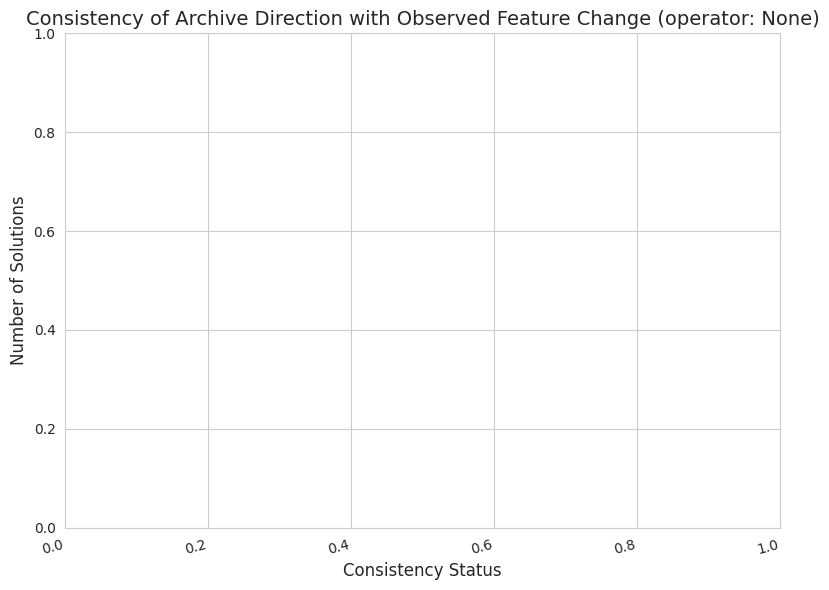

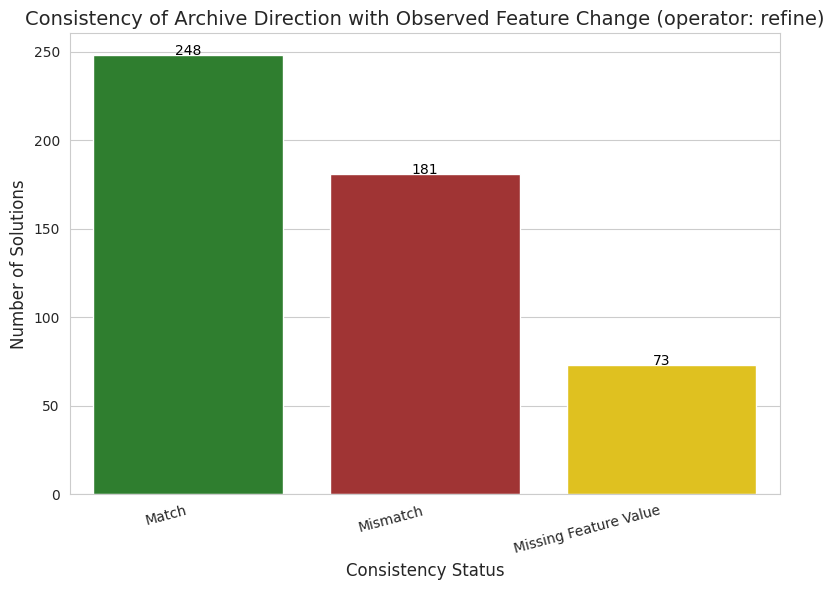

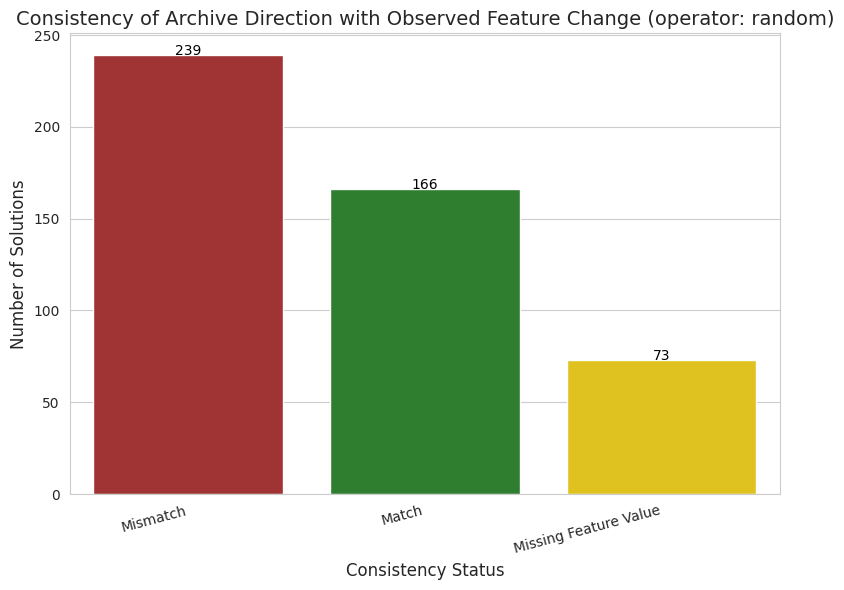

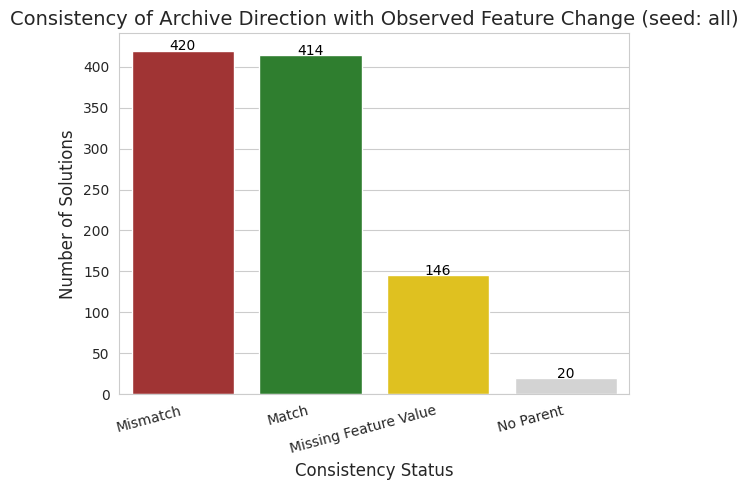

,Consistency Status,Count
0,Match,248
1,Mismatch,181
2,Missing Feature Value,73
3,Mismatch,239
4,Match,166
5,Missing Feature Value,73
6,Mismatch,420
7,Match,414
8,Missing Feature Value,146
9,No Parent,20


In [8]:
# The next thing is that I want to see how often the "archive_feature" given the "archive_direction" changed from parent to child solution. 

def analyze_archive_direction_consistency(df, name="ES-guided"):
    """
    Analyzes the consistency between the observed feature value change 
    (parent to child) and the recorded 'archive_direction', and visualizes it.

    Args:
        df (pd.DataFrame): DataFrame with 'id', 'parent_ids', 'ast_features',
        'archive_feature', and 'archive_direction'.

    Returns:
        pd.DataFrame: DataFrame containing the Match/Mismatch counts.
    """
    # 1. Index the DataFrame by 'id' for fast lookups
    df_indexed = df.set_index('id')

    def normalize_key(key):
        """
        Converts any feature key (e.g., 'Mean_Complexity', 'Max Degree') 
        to a standardized format (e.g., 'mean complexity') for robust lookup.
        """
        key = str(key).lower()
        # Replace underscores with spaces (handles snake_case keys like mean_complexity)
        key = key.replace('_', ' ')
        # Collapse multiple spaces and strip leading/trailing spaces
        return ' '.join(key.split()).strip()
    

    def get_feature_value(ast_features_dict, target_feature):
        """Looks up the value in the AST features using the normalized key."""
        # Normalize the target feature name (from archive_feature column)
        normalized_target = normalize_key(target_feature)
        
        # Create a new dictionary with ALL keys normalized for efficient lookup
        normalized_dict = {normalize_key(k): v for k, v in ast_features_dict.items()}
        
        # Look up the value
        return normalized_dict.get(normalized_target)

    def check_direction_consistency(row):
        """
        Compares the observed change in feature value (parent -> child) 
        with the recorded 'archive_direction'.
        """
        parent_ids = row['parent_ids']
        archive_feature = row['archive_feature']
        archive_direction = row['archive_direction']

        # Skip rows without a parent
        if not parent_ids:
            return 'No Parent'

        # Assume only one parent ID in the list
        parent_id = parent_ids[0]

        try:
            # 2. Lookup Parent Row and Feature Value
            parent_row = df_indexed.loc[parent_id]
            
            # Get feature values using the robust lookup function
            v_parent = get_feature_value(parent_row['ast_features'], archive_feature)
            v_child = get_feature_value(row['ast_features'], archive_feature)

            # Handle cases where feature values are missing
            if v_parent is None or v_child is None:
                return 'Missing Feature Value'

            # 3. Determine Observed Direction
            if v_child > v_parent:
                observed_direction = 'increase'
            elif v_child < v_parent:
                observed_direction = 'decrease'
            else:
                observed_direction = 'no change'

            # 4. Check for Match
            # 'no change' is considered a mismatch for 'increase'/'decrease' targets
            if observed_direction == archive_direction:
                return 'Match'
            else:
                # If 'no change' occurred, we classify it as Mismatch against the target direction
                return 'Mismatch'

        except KeyError:
            # Handle case where parent ID is not found in the DataFrame
            return 'Parent Not Found'
        except Exception:
            # Catch other potential errors
            return 'Error in Calculation'

    # Apply the check to every row
    df['consistency'] = df.apply(check_direction_consistency, axis=1)

    # Get all unique operators
    unique_operators = df['operator'].unique()

    # Set up plotting style
    sns.set_style("whitegrid")

    all_consistency_counts = pd.DataFrame()

    for operator in unique_operators:
        # Filter data for the current operator
        df_operator = df[df['operator'] == operator]

        # 5. Count the matches, mismatches, and other categories
        consistency_counts = df_operator['consistency'].value_counts().reset_index()
        consistency_counts.columns = ['Consistency Status', 'Count']
        
        # 6. Visualization (Bar Chart)
        plt.figure(figsize=(8, 6))
        
        # Define a clear color palette
        color_map = {'Match': 'forestgreen', 'Mismatch': 'firebrick', 'No Parent': 'lightgray', 
                    'Parent Not Found': 'orange', 'Missing Feature Value': 'gold', 'Error in Calculation': 'black'}
        
        # Ensure the colors are only applied to the statuses that are present in the counts
        plot_colors = [color_map.get(status, 'gray') for status in consistency_counts['Consistency Status']]
        
        sns.barplot(
            data=consistency_counts,
            x='Consistency Status',
            y='Count',
            hue='Consistency Status',
            legend=False,
            palette=plot_colors,
            order=consistency_counts['Consistency Status']
        )

        plt.title(f'Consistency of Archive Direction with Observed Feature Change (operator: {operator})', fontsize=14)
        plt.xlabel('Consistency Status', fontsize=12)
        plt.ylabel('Number of Solutions', fontsize=12)
        plt.xticks(rotation=15, ha='right')
        
        # Add counts on top of bars
        for index, row in consistency_counts.iterrows():
            plt.text(index, row['Count'] + 0.05, str(row['Count']), color='black', ha="center")

        plt.tight_layout()
        file_name = f'archive_direction_consistency_histogram_{name}_{operator}.png'
        plt.savefig(file_name)
        plt.show()
        plt.close()

        all_consistency_counts = pd.concat([all_consistency_counts, consistency_counts], ignore_index=True)

    df_seed = df.copy()
    seed = "all"

    # 5. Count the matches, mismatches, and other categories
    consistency_counts = df_seed['consistency'].value_counts().reset_index()
    consistency_counts.columns = ['Consistency Status', 'Count']
    
    # 6. Visualization (Bar Chart)
    plt.figure(figsize=(6, 5))
    
    # Define a clear color palette
    color_map = {'Match': 'forestgreen', 'Mismatch': 'firebrick', 'No Parent': 'lightgray', 
                'Parent Not Found': 'orange', 'Missing Feature Value': 'gold', 'Error in Calculation': 'black'}
    
    # Ensure the colors are only applied to the statuses that are present in the counts
    plot_colors = [color_map.get(status, 'gray') for status in consistency_counts['Consistency Status']]
    
    sns.barplot(
        data=consistency_counts,
        x='Consistency Status',
        y='Count',
        hue='Consistency Status',
        legend=False,
        palette=plot_colors,
        order=consistency_counts['Consistency Status']
    )
    
    plt.title(f'Consistency of Archive Direction with Observed Feature Change (seed: {seed})', fontsize=14)
    plt.xlabel('Consistency Status', fontsize=12)
    plt.ylabel('Number of Solutions', fontsize=12)
    plt.xticks(rotation=15, ha='right')
    
    # Add counts on top of bars
    for index, row in consistency_counts.iterrows():
        plt.text(index, row['Count'] + 0.05, str(row['Count']), color='black', ha="center")

    plt.tight_layout()
    file_name = f'archive_direction_consistency_histogram_{name}_{seed}.png'
    plt.savefig(file_name)
    plt.show()
    plt.close()

    all_consistency_counts = pd.concat([all_consistency_counts, consistency_counts], ignore_index=True)
    return all_consistency_counts

all_consistency_counts = analyze_archive_direction_consistency(data[data['method_name'] == "ES-guided"], "ES-guided-global")
#all_consistency_counts = analyze_archive_direction_consistency(data[data['method_name'] == "ES-guided-new"], "ES-guided-local")
all_consistency_counts

/home/neocortex/repos/BLADE/iohblade/plots.py:275: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
/home/neocortex/repos/BLADE/iohblade/plots.py:275: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
/home/neocortex/repos/BLADE/iohblade/plots.py:275: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

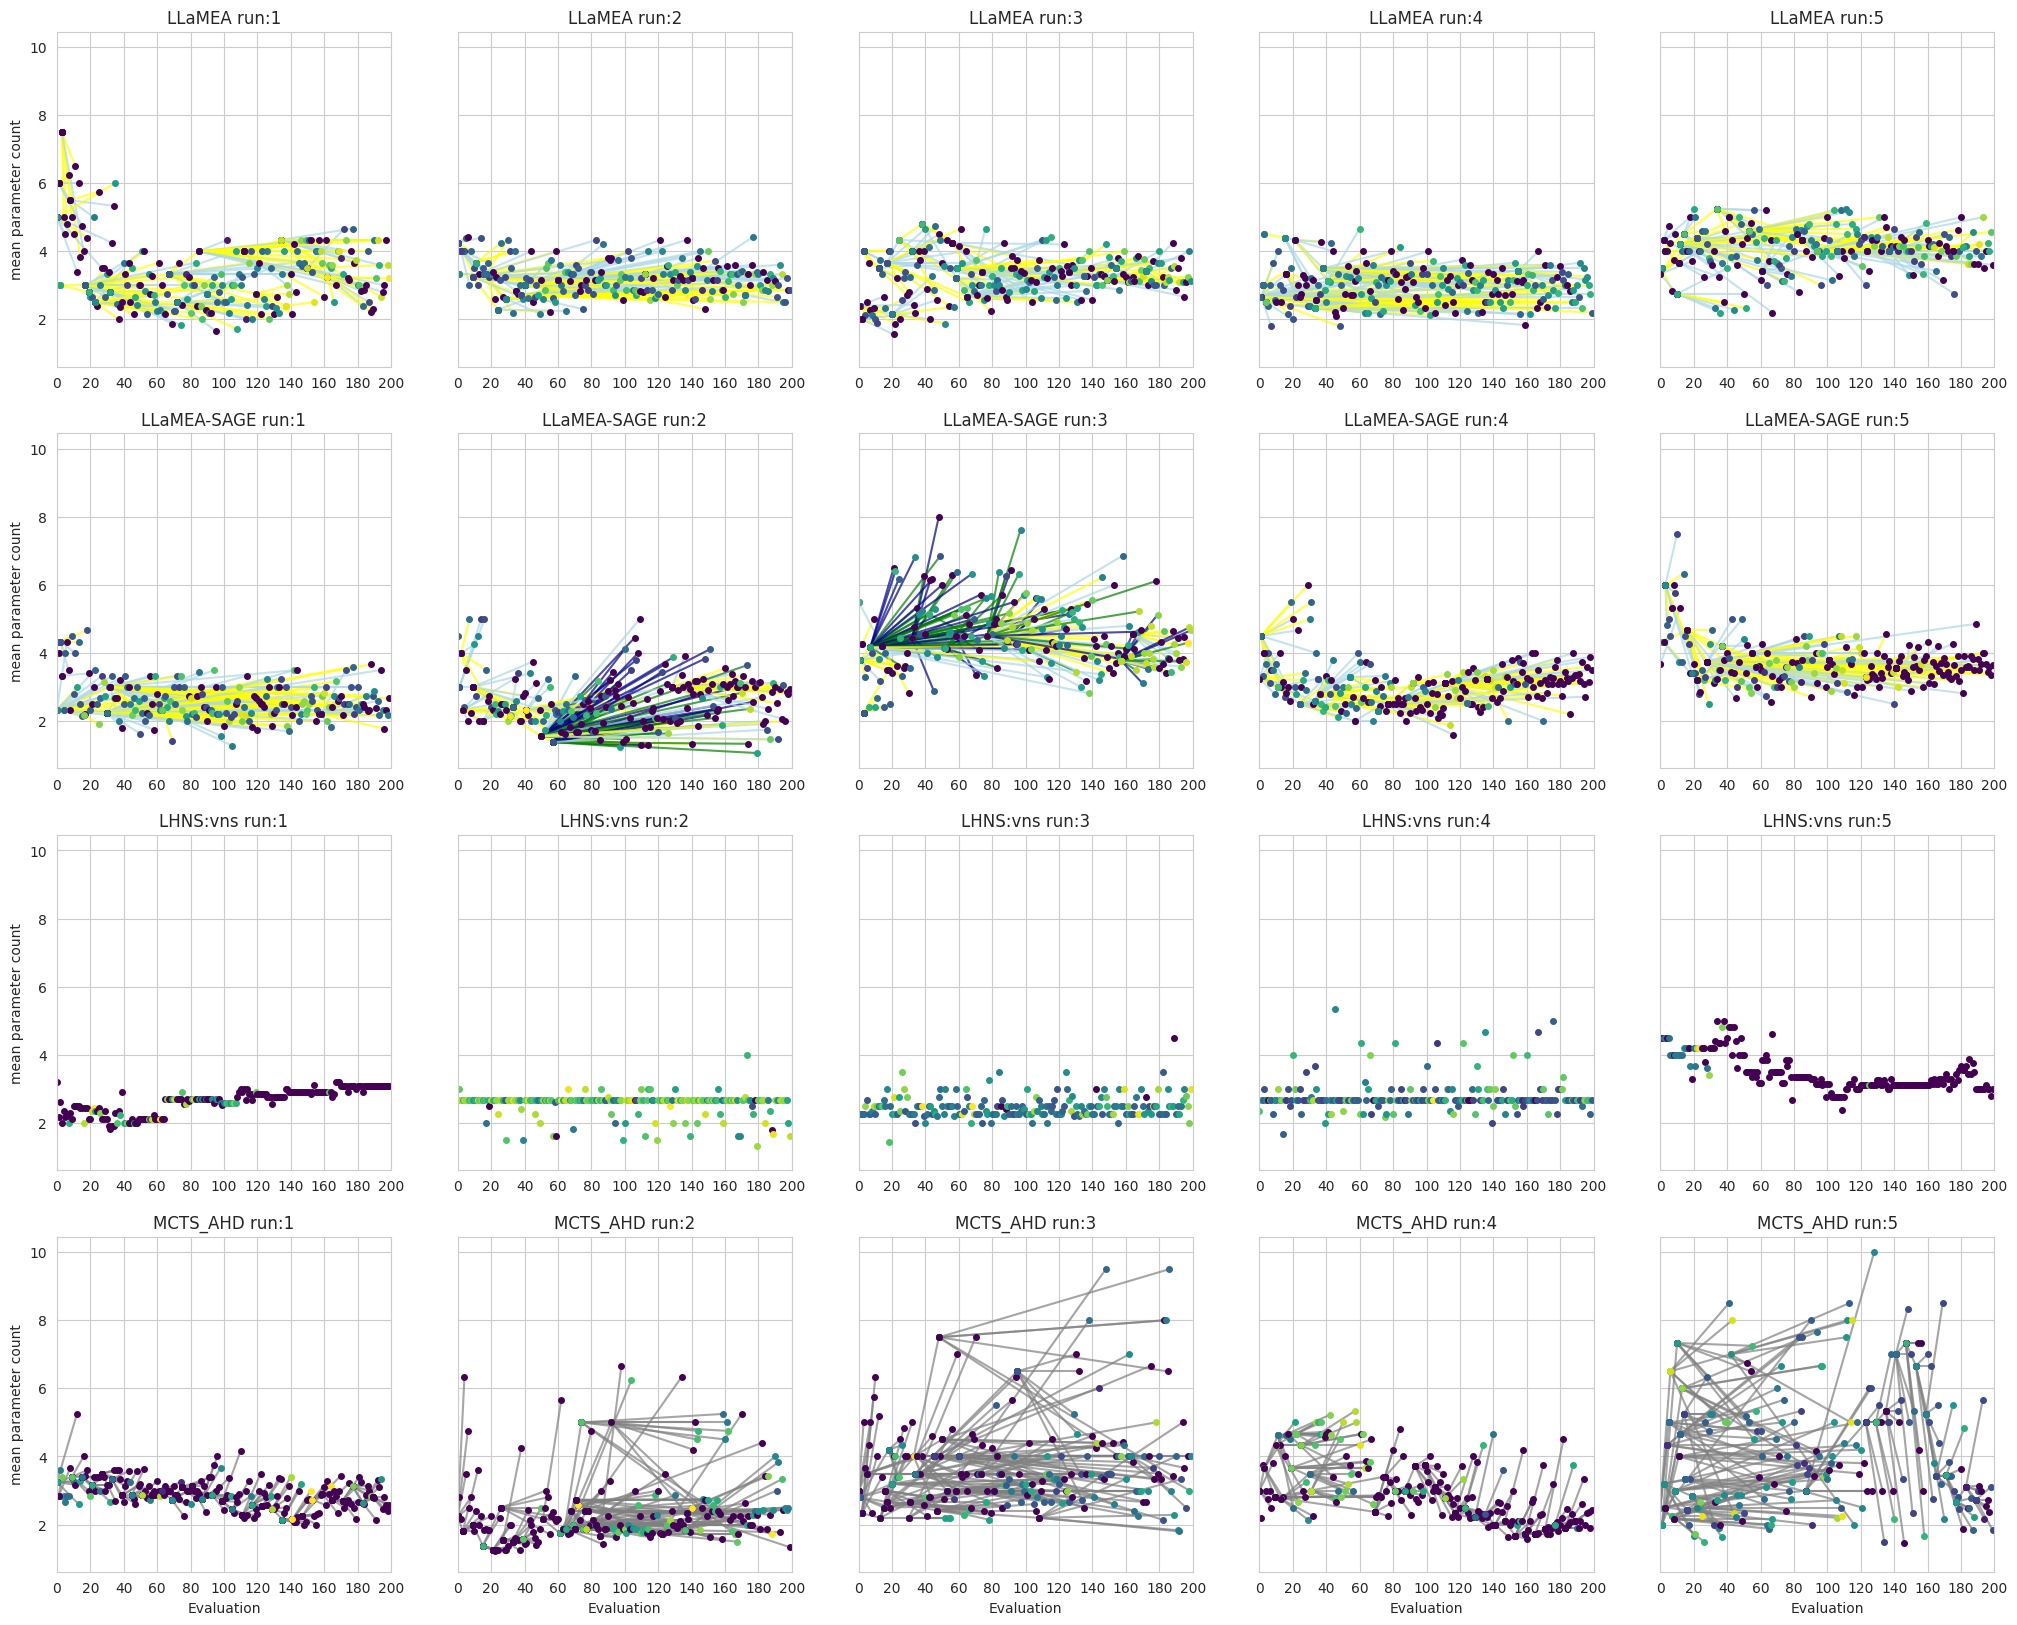

/home/neocortex/repos/BLADE/iohblade/plots.py:275: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
/home/neocortex/repos/BLADE/iohblade/plots.py:275: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
/home/neocortex/repos/BLADE/iohblade/plots.py:275: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

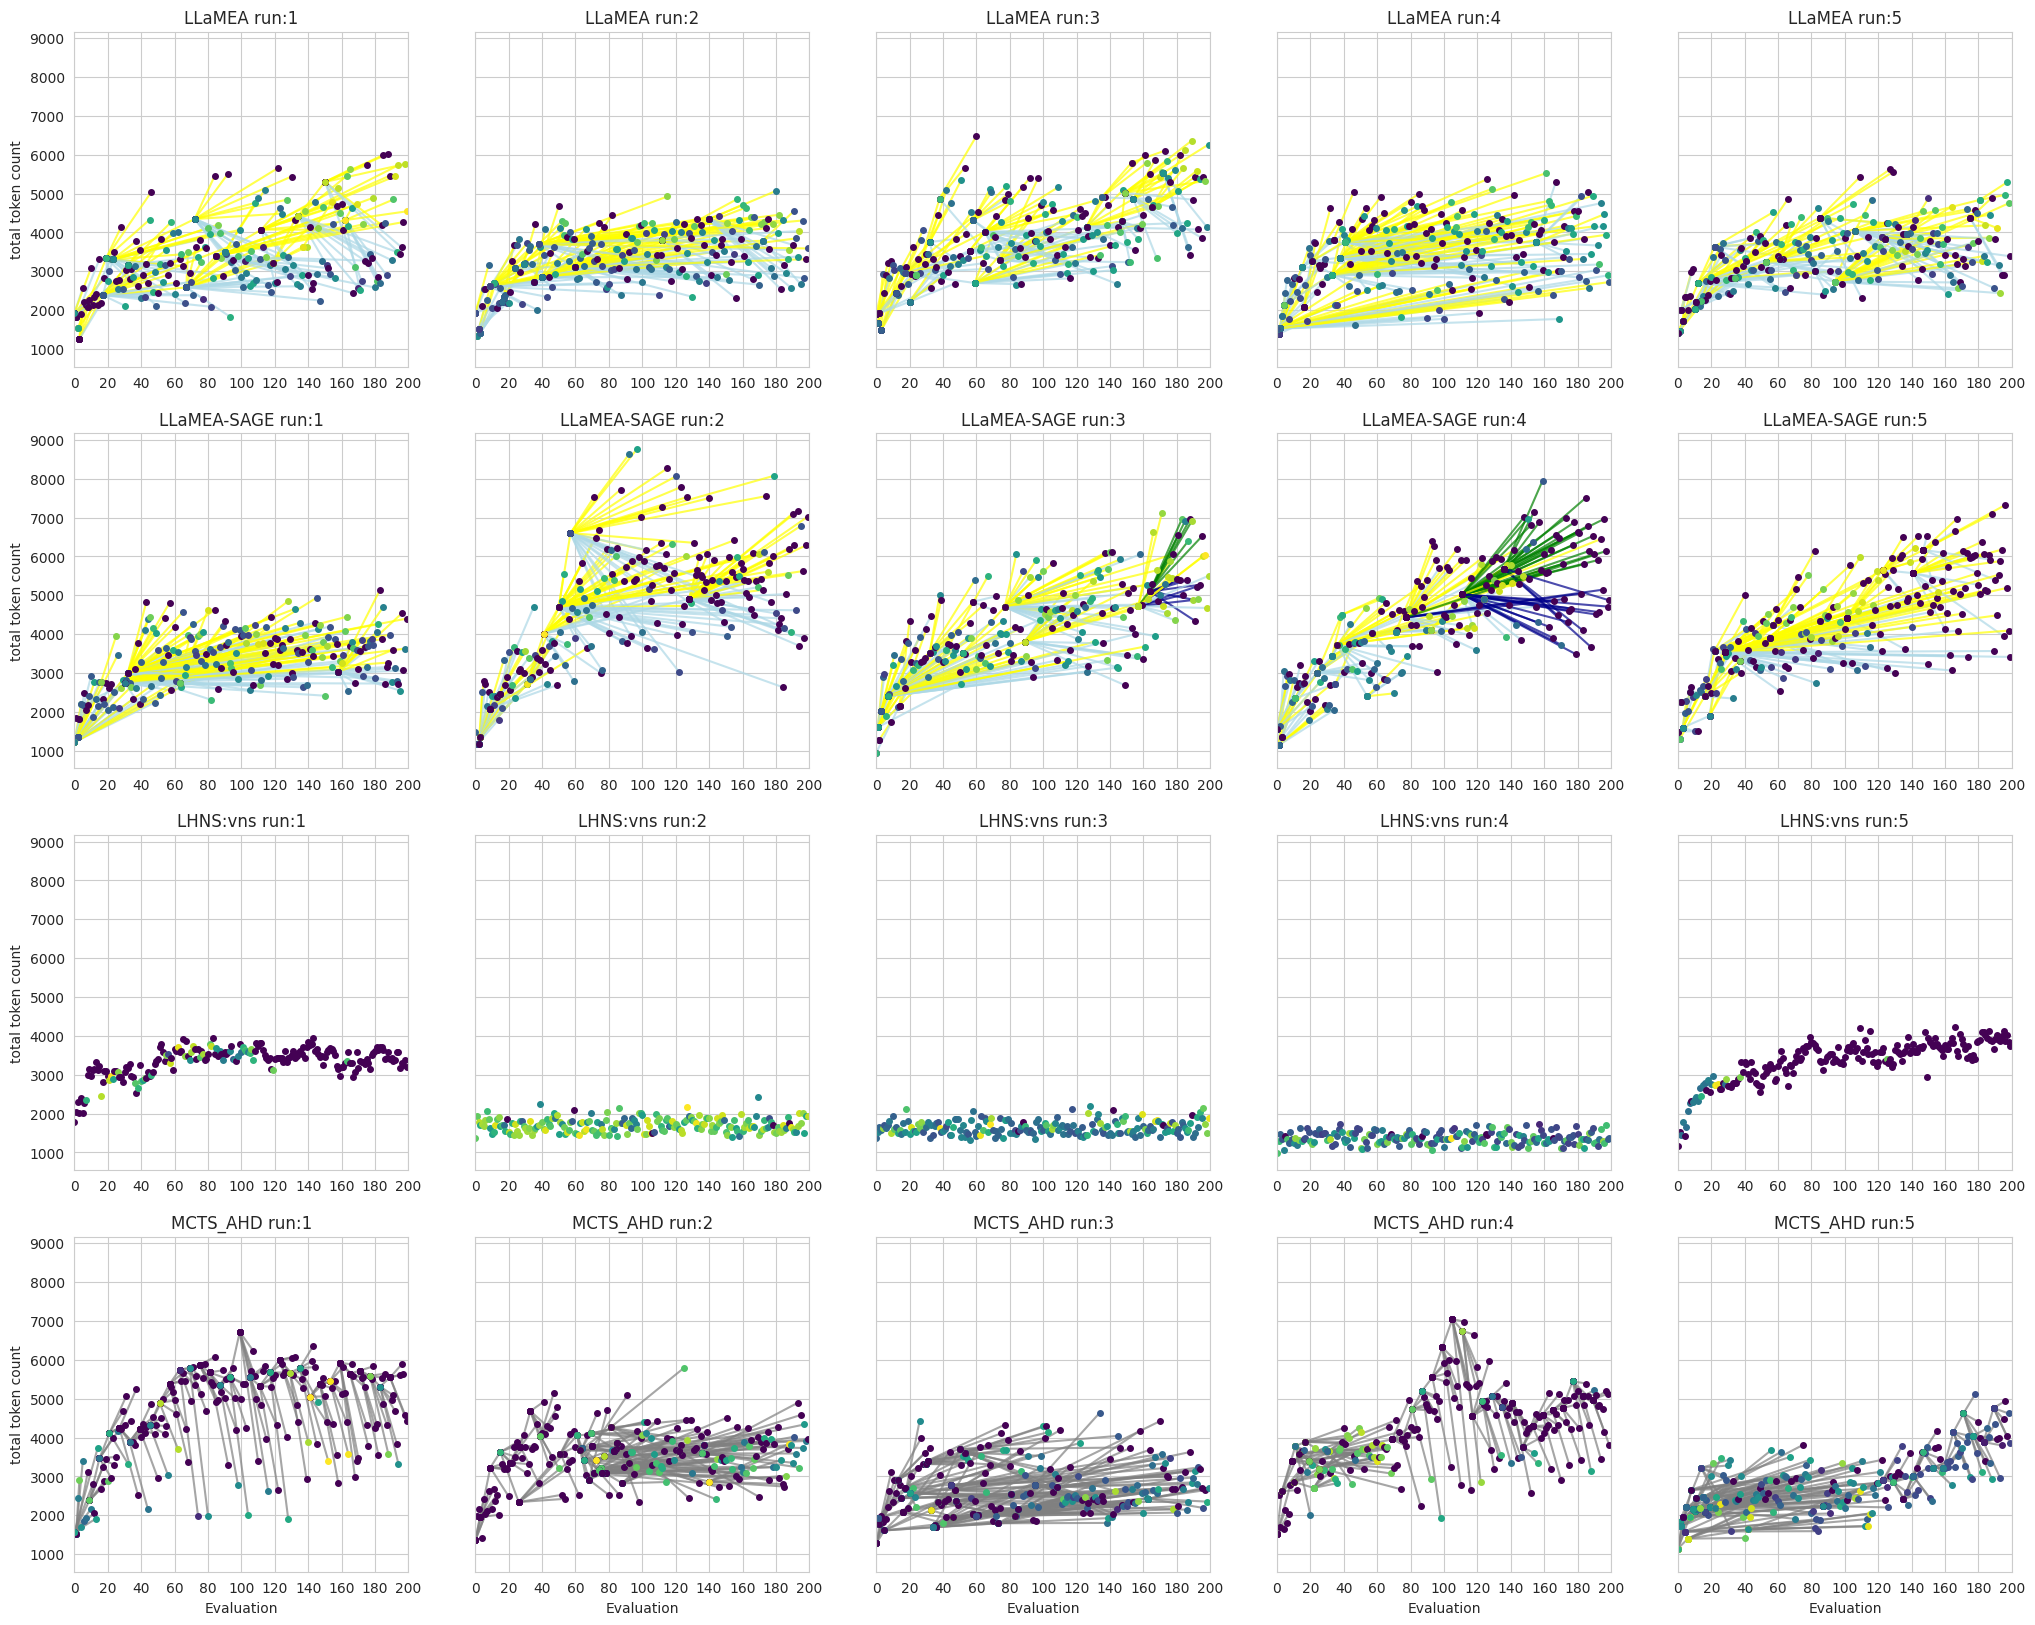

In [9]:
plot_experiment_CEG(logger, methods=["ES", "ES-guided", "LHNS:vns","MCTS_AHD"], markersize=4, save=False, budget=200, max_seeds=5, metric="mean_parameter_count") 

plot_experiment_CEG(logger, methods=["ES", "ES-guided", "LHNS:vns","MCTS_AHD"], markersize=4, save=False, budget=200, max_seeds=5, metric="total_token_count") 